In [29]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('./datasets/corporate_stress_dataset.csv')
dataset = df.copy()
dataset.head(5), dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                50000 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      50000 non-null  int64  
 11  Health_Issues                     37459 non-null  object 
 12  Comp

(   ID  Age      Gender Marital_Status   Job_Role  Experience_Years  \
 0   1   56  Non-Binary        Widowed  Developer                 5   
 1   2   46      Female         Single    Analyst                20   
 2   3   32      Female         Single  Developer                10   
 3   4   60      Female       Divorced    Analyst                26   
 4   5   25        Male        Married      Sales                29   
 
    Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
 0           102703.08                      44                1.72   
 1           165583.91                      54                0.62   
 2            38005.39                      81                1.22   
 3            51127.36                      79                2.03   
 4           174597.45                      63                1.45   
 
    Remote_Work  ...  Work_Life_Balance Family_Support_Level Job_Satisfaction  \
 0         True  ...                  9                    2         

In [37]:
relevant_columns = [
    "Job_Role", "Experience_Years", "Monthly_Salary_INR", 
    "Work_Life_Balance", "Job_Satisfaction", "Training_Opportunities",
    "Performance_Rating"
]
df_selected = df[relevant_columns]

# mapping for industires (split jobs to relevant industires)
industry_mapping = {
    "Developer": "Technology", "Analyst": "Finance", "Sales": "Business",
    "Doctor": "Healthcare", "Nurse": "Healthcare", "Engineer": "Engineering",
    "Scientist": "Research", "Teacher": "Education", "Professor": "Education",
    "Lawyer": "Law", "Accountant": "Finance", "Marketing Manager": "Business",
    "Consultant": "Consulting", "HR Manager": "Human Resources", "Data Scientist": "Technology",
    "Product Manager": "Technology", "Cybersecurity Analyst": "Technology", "Graphic Designer": "Creative",
    "Journalist": "Media", "Pharmacist": "Healthcare"
}

df_selected["Industry"] = df_selected["Job_Role"].map(industry_mapping)
df_selected = df_selected.dropna(subset=["Industry"])
print(df_selected.tail(7), df_selected.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25079 entries, 0 to 49996
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job_Role                25079 non-null  object 
 1   Experience_Years        25079 non-null  int64  
 2   Monthly_Salary_INR      25079 non-null  float64
 3   Work_Life_Balance       25079 non-null  int64  
 4   Job_Satisfaction        25079 non-null  int64  
 5   Training_Opportunities  25079 non-null  bool   
 6   Performance_Rating      25079 non-null  int64  
 7   Industry                25079 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 1.6+ MB
        Job_Role  Experience_Years  Monthly_Salary_INR  Work_Life_Balance  \
49975  Developer                40           192462.21                  5   
49978    Analyst                18           188594.12                  6   
49979  Developer                40           101926.23           

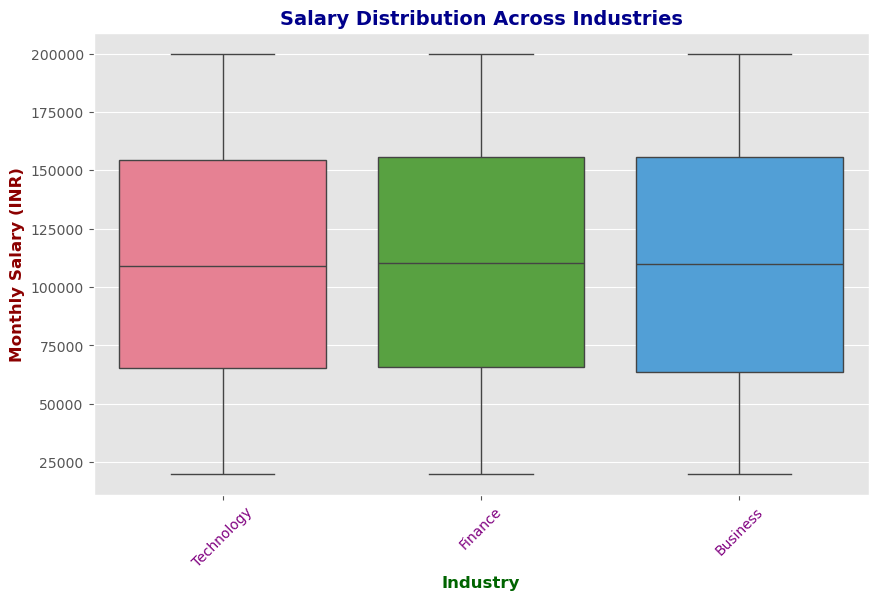

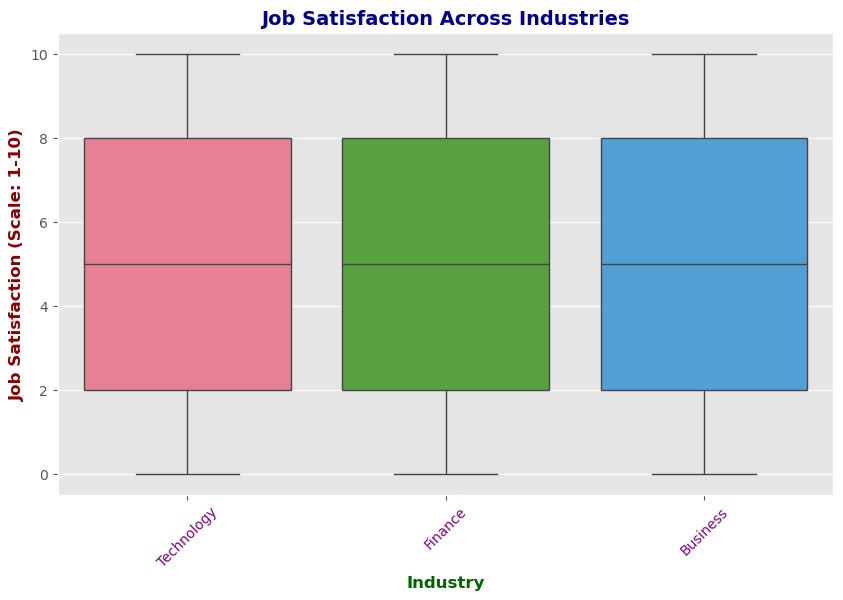

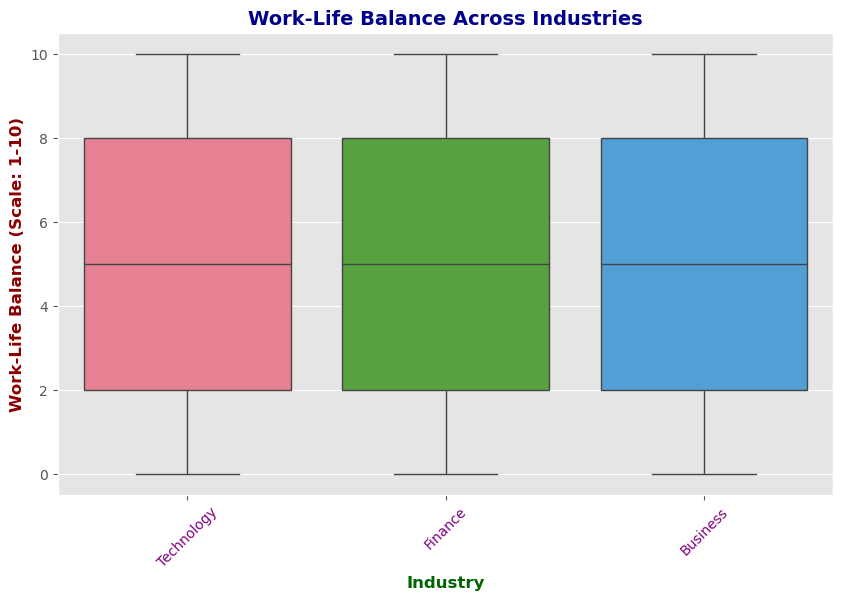

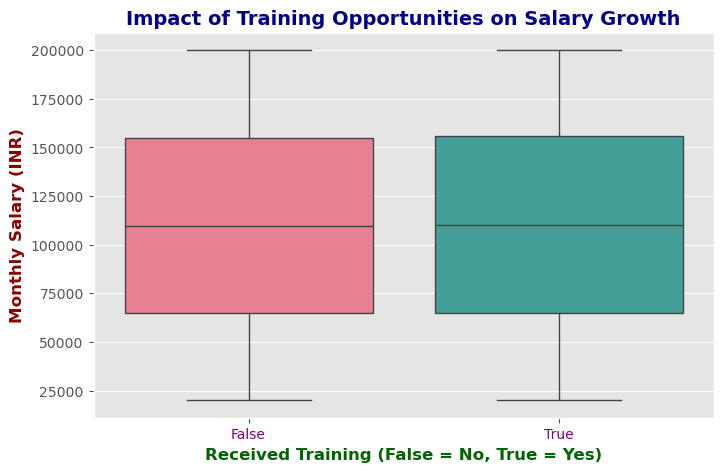

In [52]:
palette = "husl"  # RGB COLORING ISH


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Monthly_Salary_INR", data=df_selected, palette=palette)
plt.title("Salary Distribution Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Monthly Salary (INR)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Job_Satisfaction", data=df_selected, palette=palette)
plt.title("Job Satisfaction Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Job Satisfaction (Scale: 1-10)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Work_Life_Balance", data=df_selected, palette=palette)
plt.title("Work-Life Balance Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Work-Life Balance (Scale: 1-10)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Training_Opportunities", y="Monthly_Salary_INR", data=df_selected, palette=palette)
plt.title("Impact of Training Opportunities on Salary Growth", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Received Training (False = No, True = Yes)", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Monthly Salary (INR)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(fontsize=10, color='purple')
plt.show()